In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np


In [2]:
df = pd.read_csv("weather_data (1).csv")
df = df.drop(['Sunrise_Time', 'Sunset_Time'], axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['Area', 'Wind_Direction', 'Precipitation', 'Weather_Phenomena']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
label_encoder = LabelEncoder()
df['Thunderstorm_Activity'] = label_encoder.fit_transform(df['Thunderstorm_Activity'])
df['Icing_Conditions'] = label_encoder.fit_transform(df['Icing_Conditions'])
df['Weather_Condition'] = label_encoder.fit_transform(df['Weather_Condition'])
X = df.drop(['Weather_Condition'], axis=1)
y = df['Weather_Condition']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = ['Temperature', 'Wind_Speed', 'Visibility', 'Cloud_Cover', 'Barometric_Pressure', 'Humidity']
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [4]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

model.save('mymodel.h5')

Epoch 1/50
20/20 [==============================] - 3s 35ms/step - loss: 1.0853 - accuracy: 0.4750 - val_loss: 1.0125 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.9446 - accuracy: 0.5094 - val_loss: 0.9232 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.9140 - accuracy: 0.5016 - val_loss: 0.8988 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.8875 - accuracy: 0.5344 - val_loss: 0.8590 - val_accuracy: 0.4938
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.8485 - accuracy: 0.5297 - val_loss: 0.8300 - val_accuracy: 0.5188
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.8193 - accuracy: 0.5609 - val_loss: 0.7871 - val_accuracy: 0.5375
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7617 - accuracy: 0.6078 - val_loss: 0.7521 - val_accuracy: 0.6062
Epoch 8/50
20/20 [=

Epoch 1/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0995 - accuracy: 0.9734 - val_loss: 0.1624 - val_accuracy: 0.9500
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1041 - accuracy: 0.9578 - val_loss: 0.1695 - val_accuracy: 0.9250
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1173 - accuracy: 0.9516 - val_loss: 0.1441 - val_accuracy: 0.9375
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0955 - accuracy: 0.9641 - val_loss: 0.1794 - val_accuracy: 0.9312
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.1617 - val_accuracy: 0.9375
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0879 - accuracy: 0.9672 - val_loss: 0.1627 - val_accuracy: 0.9438
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1059 - accuracy: 0.9563 - val_loss: 0.1573 - val_accuracy: 0.9500
Epoch 8/50
20/20 [=

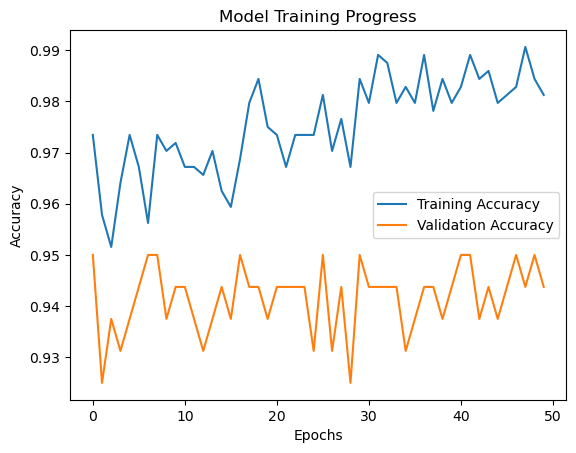

7/7 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       1.00      1.00      1.00        18
           2       0.96      0.95      0.95        74

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
 [[105   0   3]
 [  0  18   0]
 [  4   0  70]]


In [5]:
import matplotlib.pyplot as plt

# Train the model and get training history for plotting epoch chart
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plotting the epoch chart
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


In [6]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

model = load_model('mymodel.h5')

class FlightPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Flight Landing Prediction")

        self.labels = ['Area', 'Temperature', 'Wind Speed', 'Wind Direction', 'Visibility',
                       'Cloud Cover', 'Precipitation', 'Barometric Pressure', 'Humidity',
                       'Thunderstorm Activity', 'Icing Conditions', 'Weather Phenomena']

        self.entries = []

        for i, label in enumerate(self.labels):
            tk.Label(self.master, text=label).grid(row=i, column=0, padx=10, pady=5)
            entry = tk.Entry(self.master)
            entry.grid(row=i, column=1, padx=10, pady=5)
            if label in ['Area', 'Wind Direction', 'Precipitation', 'Thunderstorm Activity', 'Icing Conditions', 'Weather Phenomena']:
                entry.insert(0, 0)
            self.entries.append(entry)

        predict_button = tk.Button(self.master, text="Predict", command=self.predict)
        predict_button.grid(row=len(self.labels), column=0, columnspan=2, pady=10)

    def predict(self):
        try:
            area = int(self.entries[0].get())
            temperature = float(self.entries[1].get())
            wind_speed = float(self.entries[2].get())
            wind_direction = int(self.entries[3].get())
            visibility = float(self.entries[4].get())
            cloud_cover = int(self.entries[5].get())
            precipitation = int(self.entries[6].get())
            barometric_pressure = float(self.entries[7].get())
            humidity = float(self.entries[8].get())
            thunderstorm_activity = int(self.entries[9].get())
            icing_conditions = int(self.entries[10].get())
            weather_phenomena = int(self.entries[11].get())

            user_data = pd.DataFrame({
                'Area': [area],
                'Temperature': [temperature],
                'Wind_Speed': [wind_speed],
                'Wind_Direction': [wind_direction],
                'Visibility': [visibility],
                'Cloud_Cover': [cloud_cover],
                'Precipitation': [precipitation],
                'Barometric_Pressure': [barometric_pressure],
                'Humidity': [humidity],
                'Thunderstorm_Activity': [thunderstorm_activity],
                'Icing_Conditions': [icing_conditions],
                'Weather_Phenomena': [weather_phenomena]
            })

            user_data[numeric_columns] = scaler.transform(user_data[numeric_columns])
            user_data = pd.get_dummies(user_data, columns=columns_to_encode)

            prediction = model.predict(user_data)
            predicted_label = np.argmax(prediction)

            if predicted_label == 0:
                messagebox.showinfo("Flight Landing Prediction", "Flight cannot land.")
            else:
                messagebox.showinfo("Flight Landing Prediction", "Flight can land.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = FlightPredictionApp(root)
    root.mainloop()